การควบคุมเหมาะที่สุดและการเรียนรูู้เสริมกำลัง -- ดร.วโรดม ตู้จินดา

# 3 การควบคุมเหมาะที่สุด

หลังจากที่ได้ศึกษาเกี่ยวกับพื้นฐานการหาค่าเหมาะที่สุดในบทที่ 2 แล้ว ในบทนี้จะเริ่มต้นเข้าสู่การประุยุกต์ใช้งานในสาขาระบบควบคุม 
ซึ่งเป็นสาระสำคัญของหนังสือนี้ ดังที่ได้กล่าวแนะนำในบทแรกแล้วว่า 
แนวทางในการออกแบบและสร้างตัวควบคุมสมัยใหม่แตกต่างจากเดิมที่ใช้ตัวควบคุมที่มีโครงสร้างแน่นอน 
เช่นอยู่ในรูปของการป้อนกลับสถานะหรือเอาต์พุตผ่านอัตราขยายหรือสัมประสิทธิ์ฟังก์ชันถ่ายโอนที่เป็นค่าคงที่ 
โดยตัวควบคุมผ่านการออกแบบโดยวิธีการต่างๆ หรือหากเป็นตัวควบคุม PID 
จะอาศัยการปรับแต่งค่าพารามิเตอร์แบบออฟไลน์โดยผู้ใช้งานเพื่อได้ผลตอบสนองตามต้องการ 
การควบคุมปรับตัว (adaptive control) จะมีความยืดหยุ่นเพิ่มขึ้นโดยสามารถปรับค่าพารามิเตอร์อัตโนมัติในขณะทำงาน 
กล่าวได้ว่าเป็นการเรียนรู้ในรูปแบบหนึ่ง 
โดยบางวิธีการอาจมีความใกล้เคียงกับแนวทางที่นำเสนอในหนังสือนี้แต่อาจไม่ได้ถูกจัดรูปให้มองเห็นความสัมพันธ์อย่างชัดจน 

แท้จริงแล้วแนวทางการควบคุมเหมาะที่สุดมิได้เกิดขึ้นในยุคปัจจุบัน แต่เริ่มต้นตั้งแต่ในสมัยทศวรรษที่ 60 
ของคริสต์ศักราช  เมื่อเริ่มมีการใช้คอมพิวเตอร์ช่วยในการวิเคราะห์และออกแบบระบบควบคุมในรูปปริภูมิสถานะ 
โดยการควบคุมป้อนกลับสถานะที่เรียกว่า ตัวควบคุมกำลังสองเชิงเส้น (linear quadratic regulator) 
ซึ่งต่อไปจะเรียกชื่อย่อว่า LQR ตัวกรองคาลมาน (Kalman filter หรือ KF) หรือรวมกันเรียกว่า 
ตัวควบคุมกำลังสองแบบเกาส์เซียน (linear quadratic gaussian หรือ LQG) ล้วนมีพื้นฐานบนวิธีการหาค่าเหมาะที่สุด 
เพียงแต่สมรรถนะของคอมพิวเตอร์ในสมัยนั้นไม่เพียงพอที่จะแก้ปัญหาเหมาะที่สุดแบบเรียลไทม์ ดังนั้น LQR, KF, LQG 
จะถูกสังเคราะห์แบบออฟไลน์เป็นอัตราขยายหรือฟังก์ชันถ่ายโอนคงที่ และอิมพลิเมนต์เป็นตัวควบคุมป้อนกลับที่ไม่มีการปรับแต่ง 
ในขณะใช้งาน ในขณะที่การแก้ปัญหาเหมาะที่สุดแบบออนไลน์ในการควบคุมแบบทำนายโมเดล (model predictive control หรือ MPC) 
มีการใช้งานจำกัดเฉพาะในระบบที่ตอบสนองช้าเช่นกระบวนการทางเคมี เนื่องจากการหาคำตอบแบบออนไลน์ต้องใช้เวลานาน 

เนื้อหาหลักในบทนี้ยังคงตามรอย [1] เสริมด้วยรายละเอียดจาก [2],[3]

## 3.1 การควบคุมเหมาะที่สุดแบบเชิงกำหนด

ประเด็นสำคัญที่แตกต่างระหว่างตัวควบคุมเหมาะที่สุดกับตัวควบคุมที่อาศัยการปรับแต่งพารามิเตอร์เช่น PID คือ 
ในการควบคุมเหมาะที่สุดเราจะกำหนดดรรชนีที่เป็นตัวชี้วัดว่าตัวควบคุมทำงานได้ดีมากน้อยเพียงใด เช่น 
ความแตกต่างในการตามรอยแนววิถีที่กำหนด ความเร็วในการทำงาน หรือดรรชนีอื่นตามต้องการ 

เริ่มต้นจากปัญหาการควบคุมเหมาะที่สุดแบบเชิงกำหนด (deterministic) 
ที่การหาคำตอบจะคงเดิมโดยไม่คำนึงถึงความไม่แน่นอนในตัวแปรเช่นสัญญาณรบกวน 
การควบคุมแบบเชิงกำหนดยังใช้ประโยชน์ได้มากสำหรับโจทย์ทั่วไปในสาขาระบบควบคุม 
เนื่องจากการรบกวนประเภทต่างๆ มีขนาดเล็กเมื่อเทียบกับสัญญาณคำสั่งอ้างอิง 
ส่วนความไม่แน่นอนในการโมเดลก็มิได้เป็นแบบสโทแคสติก (stochastic)
เพราะค่าผิดพลาดระหว่างพลวัตจริงกับโมเดลไม่ใช่ค่าสุ่ม 

### 3.1.1 รูปแบบปัญหาในโดเมนเวลาต่อเนื่อง

ตัวอย่างของโจทย์ปัญหาการควบคุมเหมาะที่สุดแบบเชิงกำหนดเป็นดังนี้ 
$$
\underset{x(t),u(t)}{min} \; J(x(t),u(t)) = \int_{t_0}^{t_f} l(x(t),u(t))\,dt + l_F(x(t_f))  
$$
$$
s.t. \;\; \dot{x}(t) = f(x(t),u(t)),
$$
$$
\;\; U_{min} \le u(t) \le U_{max} \;\; หรือ \;\; u(t) \in \mathscr{U}, 
$$
$$
\;\; c(x(t)) \ge 0 \tag{3.1}
$$

บรรทัดแรกคือฟังก์ชันมูลค่าซึ่งเป็นตัวชี้วัดสมรรถนะ ประกอบด้วยพจน์แรกที่อยู่ในปริพันธ์เรียกว่า มูลค่าขั้น (stage cost) และพจน์สุดท้ายคือ มูลค่าปลาย (terminal cost)

การหาคำตอบคือคำนวณหาเอาต์พุตตัวควบคุมที่ทำให้ฟังก์ชันมูลค่านั้นน้อยที่สุด ใช้เอาต์พุตนั้นเป็นตัวขับเคลื่อนพลานต์ 
คือระบบที่ต้องการควบคุม 

ดังนั้นพลวัตของพลานต์เป็นเงื่อนไขบังคับสำคัญสำหรับปัญหาการควบคุมเหมาะที่สุด 
ซึ่งจะอยู่ในรูปเงื่อนไขบังคับสมการ นอกจากนั้นอาจมีเงื่อนไขบังคับอสมการเพิ่มเติม เช่นการจำกัดค่าของเอาต์พุตควบคุม เขียนได้ในรูปแบบขอบเขตล่างและบน $U_{min} \le u(t) \le U_{max}$หรือในกรณีทั่วไปคืออยู่ในเซตที่เป็นไปได้ $u(t) \in \mathscr{U}$
ส่วนเงื่อนไขอื่นเช่นการจำกัดค่าสถานะหรือเอาต์พุตเพิ่อมิให้ชนกับสิ่งกีดขวาง เขียนในรูปทั่วไปคือ $c(x(t)) \ge 0$  เพื่อสอดคล้องกับสัญนิยมที่ใช้ในบทที่ 2 โดยหากการจำกัดค่าอยู่ในรูป $\tilde{c}(x(t)) \le 0$ 
เพียงแต่กลับเครื่องหมาย $\tilde{c}(x(t)) = -c(x(t))$ เท่านั้น

**หมายเหตุ :** สำหรับผู้อ่านที่คุ้นเคยกับปัญหาการเรียนรู้เสริมกำลัง (ต่อไปจะเรียกย่อว่า RL)  ประเด็นสำคัญและคำศัพท์ที่แตกต่างพอสรุปได้คือ

* ฟังก์ชันวัตถุประสงค์ในปัญหา RL อยู่ในรูปของรางวัล โดยต้องการหาค่าสูงสุดของรางวัลที่ได้รับ
* เอาต์พุตของตัวควบคุมถูกเรียกว่าการกระทำ (action) หรือนโยบาย (policy)
* พลานต์หรือพลวัตที่ต้องการควบคุมถูกเรียกว่าสภาพแวดล้อม (environment)
* ใช้คำว่า ตัวกระทำ (agent) แทนตัวควบคุม
* การเรียนรู้ในปัญหา RL ส่วนใหญ๋เป็นแบบออฟไลน์ ไม่มีเงื่อนไขเคร่งครัดด้านเวลาในการหาคำตอบ โดยฟังก์ชันวัตถุประสงค์เป็นแบบไม่เป็นเชิงเส้นและมักไม่เป็นแบบคอนเวกซ์ อาจมีตัวแปรตัดสินใจจำนวนมาก 
* ปัญหา RL โดยทั่วไปไม่จำเป็นต้องทำงานบนระบบที่ทรัพยากรจำกัด เช่นระบบฝังตัว   

ข้อสังเกตสำหรับโจทย์ปัญหา (3.1)

* ปัญหาการควบคุมเหมาะที่สุดในโดเมนเวลาต่อเนื่องมักถูกเรียกว่า มิติอนันต์ (infinite dimensional) มีที่มาจากกรณีของระบบดีสครึต (ที่เราจะให้ความสำคัญมากกว่า) จะเรียกแต่ละค่าของตัวแปร $x, u$ ว่า จุดเงื่อน (knot points) เหมือนที่ใช้ในฟังก์ชันเสมือนพหุนาม (spline functions) ในระบบเวลาต่อเนื่องเปรียบได้กับการเพิ่มจุดเงื่อนมากขึ้นจนเข้าสู่อนันต์
* คำตอบจะอยู่ในรูปแนววิถีวงเปิด (open-loop trajectories) ของ $x, u$ โดยไม่มีการควบคุมป้อนกลับ ซึ่งจะแตกต่างจากกรณีสโทแคสติก
* ในบางปัญหาจะได้คำตอบเชิงวิเคราะห์ (analytic solutions) แต่มีไม่มากนัก

### 3.1.2 รูปแบบปัญหาในโดเมนเวลาดีสครีต

ตัวอย่างของปัญหาการควบคุมเหมาะที่สุดในโดเมนเวลาดีสครีตเขียนได้ดังนี้

$$
\underset{x_{1:N},u_{1:N-1}}{min} \; J(x_{1:N},u_{1:N-1}) =  \sum_{k=1}^{N-1}l(x_k,u_k) + l_F(x_N)
$$
$$
s.t. \;\; x_{k+1} = f(x_k,u_k),
$$
$$
\;\; U_{min} \le u_k \le U_{max} \;\; หรือ \;\; u_k \in \mathscr{U} \;\; \forall k, 
$$
$$
\;\; c(x_k) \ge 0 \;\; \forall k \tag{3.2}
$$

โดยคำอธิบายสำหรับพจน์ทั้งหมดสอดคล้องกับกรณีเวลาต่อเนื่อง (3.1) เพียงแต่ค่าตัวแปรอยู่ในรูปของตัวอย่าง (samples) จำนวน $N$ ค่าสำหรับ $x_k$ และ $N-1$ ค่าสำหรับ $u_k$ พลวัตที่เป็นเงื่อนไขสมการและการจำกัดค่าในเงื่อนไขอสมการอยู่ในรูปดีสครีตทั้งหมด 

ข้อสังเกตสำหรับ (3.2)

* ปัญหานี้เรียกว่ามิติจำกัด (finite dimensional)
* ค่าตัวอย่าง $x_k, u_k$ มักถูกเรียกว่าจุดเงื่อน
* การแปลงปัญหาจากเวลาต่อเนื่องเป็นดีสครีตทำได้โดยการประมาณค่าปริพันธ์วิธีต่างๆ เช่น ผลต่างข้างหน้า/ย้อนหลัง การแปลงเชิงเส้นคู่ หรือวิธีรุงเงคุตตา (Runge-Kutta)  
* การแปลงปัญหาจากเวลาดีสครีตเป็นต่อเนื่องทำได้โดยการประมาณค่าในช่วง (interpolation)

### 3.1.3 หลักการค่าต่ำสุดของพอนเทรียกิน

วิธีการแรกในการหาคำตอบเหมาะที่สุดอาศัยหลักการหาค่าต่ำสุดของพอนเทรียกิน (Pontryagin's minimum principle) 
ซึ่งมีต้นกำเนิดจากนักคณิตศาสตร์ชาวรัสเซีย Lev Semyonovich Pontryagin ในปี ค.ศ. 1956 
(ชื่อเรียกในช่วงต้นกำเนิดคือการหาค่าสูงสุดของพอนเทรียกิน) โดยกล่าวถึงการแก้ปัญหาที่เรียกว่าระบบฮามิลโทเนียน (Hamiltonian) 
ซึ่งเป็นปัญหาค่าขอบ 2 จุด (two-point boundary value problem) 
และเป็นเงื่อนไขจำเป็นอันดับหนึ่งสำหรับระบบควบคุมเหมาะที่สุดแบบเชิงกำหนด ในระบบดีสครีตเป็นกรณีพิเศษของเงื่อนไข KKT

**หมายเหตุ :** การอนุพัทธ์ดั้งเดิมกระทำในโดเมนเวลาต่อเนื่องโดยอาศัยแคลคูลัสการแปรผัน (calculus of variation) 
ซึ่งมีความเป็นคณิตศาสตร์ค่อนข้างมาก ดังนั้นแนวทางใน [1] จะอนุพัทธ์ในโดเมนดีสครีต  
และหากต้องการแปลงเป็นผลในเวลาต่อเนื่องทำได้โดยลิมิตขั้นเวลาสู่ศูนย์ วิธีการนี้อาจไม่ถูกใจผู้ที่เคร่งทางคณิตศาสตร์เพราะจะมีปัญหาทางเทคนิคเล็กน้อยเช่นจุดไม่ต่อเนื่องของฟังก์ชัน แต่ไม่ใช่ปัญหาหลักด้านการประยุกตฺ์ใช้งาน 

จาก (3.2) เพื่อความง่ายในการอธิบายจะละทิ้งเงื่อนไขอสมการสำหรับ $x_k$ สร้างลากรานเจียนดังนี้
$$
L = \sum_{k=1}^{N-1}l(x_k,u_k) + \lambda_{k+1}^T(f(x_k,u_k)-x_{k+11})+l_F(x_k) \tag{3.3}
$$

ในการอนุพัทธ์มักจะสร้างพจน์ที่เรียกว่าฮามิลโทเนียน
$$
H(x,u,\lambda) = l(x,u) + \lambda^T f(x,u) \tag{3.4}
$$

เมื่อใช้ค่า $H$ ใน $L$ และใช้กลเม็ดในการดึงพจน์ออกจากผลรวมและเปลี่ยนค่าตัวชี้ จะได้ผลดังนี้ 
$$
L = H(x_1,u_1,\lambda_2) + \left[\sum_{k=2}^{N-1}H(x_k,u_k,\lambda_{k+1})
-\lambda_k^Tx_k\right] + l_F(x_N) - \lambda_N^Tx_N \tag{3.5}
$$

โดยขั้นตอนเดิมเมื่อต้องการใช้วิธีนิวตัน คือหาอนุพันธ์ย่อยของ $L$ เทียบกับ $\lambda_k, x_k, x_N$ และให้เท่ากับศูนย์

$$
\frac{\partial L}{\partial \lambda_k} = \frac{\partial H}{\partial \lambda_k} - x_{k+1} = 
f(x_k, u_k) - x_{k+1} = 0 \tag{3.6}
$$
$$
\frac{\partial L}{\partial x_k} = \frac{\partial H}{\partial x_k} - \lambda_{k}^T = 
\frac{\partial l(x_k,u_k)}{\partial x_k} + 
\lambda_{k+1}^T\frac{\partial f(x_k,u_k)}{\partial x_k} -\lambda_k^T  = 0 \tag{3.7}
$$
$$
\frac{\partial L}{\partial x_N} = \frac{\partial l_F(x_N)}{\partial x_N} - \lambda_N^T = 0 \tag{3.8}
$$

ส่วนสำหรับสมการของ $u_k$ เราจะเขียนในรูปการหาค่าต่ำสุดเพื่อความสะดวกในการจัดการกับเงื่อนไขอสมการ

$$
u_k = \underset{u}{arg min} \; H(x_k, u, \lambda_{k+1})
$$
$$
s.t \;\; u \in \mathscr{U} \tag{3.9}
$$

สรุปจาก (3.6)-(3.9) ได้ความสัมพันธ์ดังนี้

$$
x_{k+1} = \nabla_\lambda H(x_k, u_k, \lambda_{k+1}) \tag{3.10}
$$
$$
\lambda_{k} = \nabla_x H(x_k, u_k, \lambda_{k+1}) \tag{3.11}
$$
$$
u_k = \underset{u}{arg min} \; H(x_k, u, \lambda_{k+1})
$$
$$
s.t \;\; u \in \mathscr{U} \tag{3.12}
$$
$$
\lambda_N = \frac{\partial l_F(x_N)}{\partial x_N} \tag{3.13}
$$

โดยวิธีการหาลิมิต สามารถบรรยายในระบบเวลาต่อเนื่องได้เป็นดังนี้

$$
\dot{x} = \nabla_\lambda H(x, u, \lambda) \tag{3.14}
$$
$$
-\dot{\lambda} = \nabla_x H(x, u, \lambda) \tag{3.15}
$$
$$
u = \underset{u}{arg min} \; H(x, \tilde{u}, \lambda)
$$
$$
s.t \;\; \tilde{u} \in \mathscr{U} \tag{3.16}
$$
$$
\lambda(t_f) = \frac{\partial l_F}{\partial x} \tag{3.17}
$$

ข้อสังเกต

* วิธีการนี้มีรูปแบบของปัญหาค่าขอบ 2 จุด คือหาค่า $x$ ในทิศทางข้างหน้าโดยหาปริพันธ์ของสมการอนุพันธ์
และหาค่า $\lambda$ ในทิศทางย้อนหลังโดยการลดค่าเกรเดียนต์ 
ซึ่งมีอัลกอริทึมหลายประเภทที่ใช้แนวทางนี้ ตัวอย่างหนึ่งคือการแพร่กระจายย้อนหลัง (back propagation) .ในการเรียนรู้เชิงลึก 
* วิธีการนี้มีชื่อเรียกว่า วิธีโดยอ้อม (indirect method) หรือ วิธีการยิงโดยอ้อม (indirect shooting)
* ในระบบเวลาต่อเนื่อง $\lambda(t)$ มีชื่อเรียกว่าแนววิถีสถานะร่วม (costate)
* วิธีการนี้มีข้อด้อยในการคำนวณ โดยใช้เวลามากและประสบปัญหาเชิงเลขในแบบเดียวกับที่พบในโครงข่ายประสาทเทียม 
คือการเพิ่มค่าอย่างมากหรือหายไปของเกรเดียนต์ นอกจากนั้นยังไม่สามารถจัดการกับเงื่อนไขบังคับอสมการได้โดยตรง 
ดังนั้นความนิยมเริ่มลดลงสวนทางกับการพัฒนาด้านคอมพิวเตอร์ เพราะปัจจุบันการคำนวณแบบอื่นเช่นวิธีนิวตันให้ผลดีกว่า


### 3.1.4 ตัวควบคุมกำลังสองเชิงเส้น

ตัวควบคุมกำลังสองเชิงเส้นหรือ LQR 
เรียกได้ว่าเป็นกรณีพิเศษของการควบคุมเหมาะที่สุดแบบเชิงกำหนดที่มีความสำคัญและมีประโยชน์อย่างยิ่ง 
เนื่องจาก (สำหรับปัญหาขั้นพื้นฐาน) สามารถหาคำตอบได้ในรูปปิด รูปแบบของปัญหาเขียนได้ดังนี้

$$
\underset{x_{1:N},u_{1:N-1}}{min} \; J =  
\sum_{k=1}^{N-1}\frac{1}{2}x_k^TQ_kx_k + \frac{1}{2}u_k^TR_ku_k 
+ \frac{1}{2}x_N^TQ_Nx_N
$$
$$
s.t. \;\; x_{k+1} = A_kx_k + B_ku_k, \;\; Q_k \succcurlyeq 0, \;\; R_k \succ 0 \tag{3.18}
$$

โดย $Q_k, R_k$ คือเมทริกซ์ให้ค่าน้ำหนักกับสถานะและเอาต์พุตควบคุมตามลำดับ 
ซึ่งมีคุณสมบัติทำให้ปัญหาเป็นแบบคอนเวกซ์ $Q_k$ 
เป็นแบบกึ่งบวกแน่นอนเพราะเรายอมให้ค่าน้ำหนักของสถานะบางตัวเป็นศูนย์ได้ 
แต่ $R_k$ ต้องเป็นแบบบวกแน่นอนเสมอ เพราะหากไม่มีการให้ค่าน้ำหนักกับเอาต์พุตตัวควบคุม 
ในการคำนวณคำตอบที่มีค่าต่ำสุด อัลกอรึทึมจะโกงในการหาคำตอบโดยการใช้ $u_k$ สูงมากเข้าสู่อนันต์ 

สำหรับพลวัตที่เป็นเงื่อนไขสมการจะเห็นว่าอยู่ในรูปเชิงเส้น 
ซึ่งอาจเป็นการประมาณค่าจากพลวัตไม่เป็นเชิงเส้นเฉพาะที่ ตัวอย่างเช่นในการควบคุมลูกตุ้มหัวกลับ 
(invert pendulum) สามารถประมาณค่าพลวัตเมื่อลูกตุ้มอยู่ในตำแหน่งหัวกลับในแนวดิ่งเป็นพลวัตเชิงเส้นได้ 
เมื่อการเบี่ยงเบนของมุมก้านต่อมีค่าน้อย 

จากปัญหา LQR พื้นฐานนี้สามารถขยายได้หลายรูปแบบ เช่นแนวนอนอนันต์ (infinite horizon) สโทแคสติก 
และปัญหา LQR จะเรียกว่าเป็นแบบไม่แปรเปลี่ยนตามเวลา (time invariant) เมื่อเมทริกซ์เป็นค่าคงที่ 
กล่าวคือ $A_k = A, B_k = B, Q_k = Q, R_k = R, \forall k$ เพื่อความง่ายจะใช้ในตัวอย่างด้านล่าง

ในการแก้ปัญหา LQR โดยวิธีการยิงโดยอ้อม เราใช้ความสัมพันธ์ดังนี้

$$
x_{k+1} = \nabla_\lambda H(x_k, u_k, \lambda_{k+1}) = Ax_k + Bu_k \tag{3.19}
$$
$$
\lambda_k = \nabla_x H(k_k, u_k, \lambda_{k+1}) = Qx_k + A^T\lambda_{k+1} \tag{3.20}
$$
$$
\lambda_N = Q_Nx_N \tag{3.21}
$$
$$
u_k = \nabla_u H(x_k, u_k, \lambda_{k+1}) = 0 \Rightarrow - R^{-1}B^T\lambda_{k+1} \tag{3.22}
$$

เค้าโครงของอัลกอริทึมการยิงโดยอ้อมเป็นดังนี้

<hr>

1. คาดเดาค่าเริ่มต้น $u_{1:N-1}$ โดยอาจเริ่มจากค่าศูนย์ทั้งหมด
2. จำลองโดยการแผ่ออก (rollout) ในทิศทางข้างหน้า เพื่อหาค่า $x_{1:N}$
3. คำนวณย้อนกลับเพื่อหาค่า $\lambda, \Delta u$
4. แผ่ออกค่า $\Delta u$ โดยมีการค้นหาตามเส้น
5. ไปที่ขั้นตอน 3. จนกว่าจะลู่เข้า

    <hr>
    
**ตัวอย่าง 3.1** ต้องการใช้ตัวควบคุม LQR กับระบบปริพันธ์คู่ (double integrator)
$$
\dot{x} = 
\left[\begin{array}{c}
\dot{q} \\
\ddot{q}
\end{array}\right] = 
\left[\begin{array}{cc}
0 & 1 \\
0 & 0 
\end{array}\right] 
\left[\begin{array}{c}
q \\
\dot{q}
\end{array}\right] + 
\left[\begin{array}{c}
0 \\
1
\end{array}\right]u \tag{3.23}
$$
เราอาจมองระบบนี้เป็นเสมือนก้อนอิฐบล็อกที่เลื่อนไปบนพื้นน้ำแข็งโดยไม่มีแรงเสียดทาน 
สถานะ $[q, \dot{q}]^T$ คือค่าตำแหน่งและความเร็วของก้อนอิฐ และ $u$ 
คือแรงที่กระทำ เราสามารถแปลงสมการปริภูมิสถานะนี้เป็นระบบดีสครีตได้เมื่อกำหนดคาบเวลาการสุ่ม $h$
$$
x_{k+1} =  Ax_k + Bu_k = 
\left[\begin{array}{cc}
1 & h \\
0 & 1 
\end{array}\right] 
\left[\begin{array}{c}
q_k \\
\dot{q}_k
\end{array}\right] + 
\left[\begin{array}{c}
\frac{1}{2}h^2 \\
h
\end{array}\right]u_k \tag{3.24}
$$

นำเข้าแพ็กเกจที่ใช้งาน 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.linalg import norm, solve

สร้างพลวัตของพลานต์ (3.24) โดยกำหนดคาบเวลา $h = 0.1$ วินาที

In [2]:
# Discrete dynamics
h = 0.1  # time step
A = np.array([[1,h],[0,1]])
B = np.array([0.5*h*h, h]).reshape(2,1)

สร้างเวกเตอร์ช่วงเวลาที่ต้องการพล็อตสถานะตามต้องการ ในตัวอย่างนี้กำหนดเท่ากับ 10 วินาที

In [3]:
n = 2     # number of state
m = 1     # number of controls
Tfinal = 10.0 # final time #try larger values
N = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(N-1),h)

กำหนดการให้น้ำหนักในฟังก์ชันมูลค่า ทดลองเปลี่ยนค่าได้ตามต้องการ เพียงสอดคล้องเงื่อนไขใน (3.18)

In [4]:
# Cost weights
Q = 1.0*np.eye(2)
R = 0.1
Rmat = np.array(R).reshape(1,1)  # used in solve
Qn = 1.0*np.eye(2)

นิยามฟังก์ชัน J() สำหรับคำนวณมูลค่า และ rollout() ในการคำนวณ $x$ ในทิศทางข้างหน้า

In [5]:
def J(xhist, uhist):
    xend = xhist[:,-1]
    cost = 0.5*xend.T@Qn@xend
    for k in range(N-1):
        xk = xhist[:,k]
        uk = uhist[k]
        cost = cost + 0.5*xk.T@Q@xk + 0.5*uk*R*uk
    return cost

In [6]:
def rollout(xhist, uhist):
    xnew = np.zeros(xhist.shape)
    xnew[:,0] = xhist[:,0]
    for k in range(N-1):
        xnew[:,[k+1]] = A@xnew[:,[k]] + B*uhist[k]
    return xnew

คาดเดาค่าเริ่มต้นและคำนวณมูลค่าเริ่มต้น

In [7]:
# Initial condiations
x0 = np.array([[1.0],[0]])
# Initial guess
xhist = np.repeat(x0,N,axis=1)
uhist = np.zeros((N-1))
du = np.ones((N-1))
lambdahist = np.zeros((n,N))

xhist = rollout(xhist, uhist) # initial rollout to get state trajectory
J(xhist,uhist)  # initial cost

50.5

เซลล์ด้านล่างนี้คือการคำนวณตามขั้นตอน 3,4 วนซ้ำในทิศทางย้อนหลังและข้างหน้าจนกว่าจะลู่เข้า 
ซึ่งจะใช้เวลานาน (บนคอมพิวเตอร์ผู้เขียนใช้เวลาร่วมหนึ่งนาที) 

In [8]:
# Warning : This cell takes quite long time to finish
b = 1e-2 #line search tolerance
α = 1.0
iter = 0
while np.max(abs(du))>1e-2: # terminate when gradient is small enough
    # backward pass to compute lambda and du
    lambdahist[:,[N-1]] = Qn @xhist[:,[N-1]]
    for k in range(N-1,0,-1):
        du[k-1] = -(uhist[k-1] + solve(Rmat, B.T@lambdahist[:,[k]]).item())
        lambdahist[:,[k-1]] = Q@xhist[:,[k-1]] + A.T@lambdahist[:,[k]]
        
    # forward pass with line search to compute x
    alpha = 1.0
    unew = uhist + alpha*du
    xnew = rollout(xhist, unew)
    while J(xnew, unew) > J(xhist, uhist) - b*alpha*du.T@du:
        alpha = 0.5*alpha
        unew = uhist + alpha*du
        xnew = rollout(xhist, unew)
    uhist = unew
    xhist = xnew
    iter += 1

ตรวจสอบจำนวนครั้งในการวนรอบ และมูลค่าของคำตอบ

In [9]:
iter

2416

In [10]:
J(xhist,uhist)

6.658621241414692

พล็อตแนววิถีของสถานะและเอาต์พุตตัวควบคุมได้ดังในรูปที่ 3.1 และ 3.2 
จะเห็นได้ว่าจากตำแหน่งเริ่มต้น $x=1$ ลู่เข้าสู่ศูนย์แสดงถึงพฤติกรรมการคุมค่า 
โดยมีกราฟความเร็วที่สอดคล้องกัน
เอาต์พุตตัวควบคุมเริ่มจากค่าลบสู่ค่ายอดบวกในช่วงเวลาประมาณ $t = 1$ วินาที หลังจากนั้นลู่เข้าสู่ศูนย์

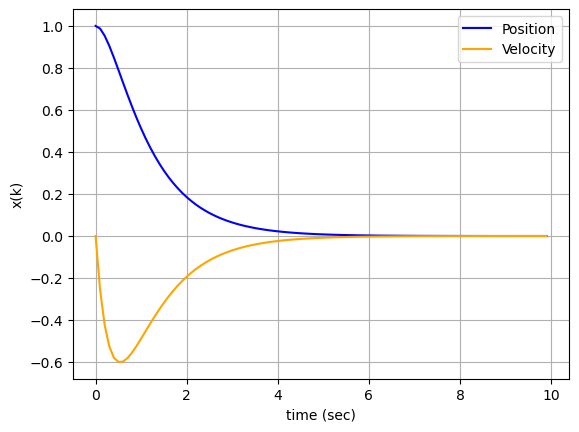

In [11]:
plt.figure()
plt.plot(thist,xhist[0,0:N-1],"b-",thist,xhist[1,0:N-1],'orange')
plt.xlabel("time (sec)")
plt.ylabel("x(k)")
plt.legend(["Position","Velocity"])
plt.grid(True)
plt.show()

รูปที่ 3.1 แนววิถีของสถานะ $x$ จากตัวควบคุม LQR ในตัวอย่าง 3.1

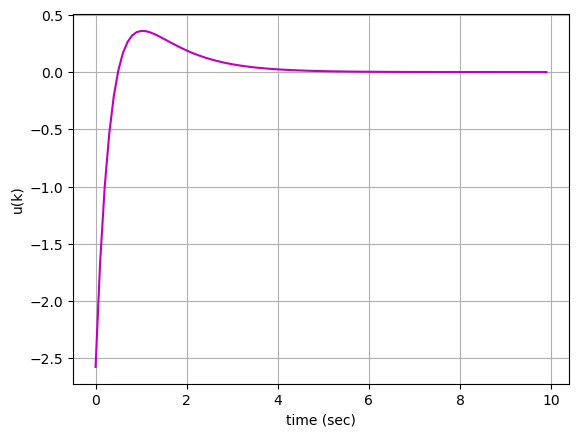

In [12]:
plt.figure()
plt.plot(thist,uhist,"m-")
plt.xlabel("time (sec)")
plt.ylabel("u(k)")
plt.grid(True)
plt.show()

รูปที่ 3.2 แนววิถีของเอาต์พุต $u$ จากตัวควบคุม LQR ในตัวอย่าง 3.1

หากต้องการรู้สึกถึงข้อด้อยของวิธีนี้ ทดลองเพิ่มช่วงเวลาในการจำลองผลเป็น 10 วินาทีหรือมากกว่า 
จะพบว่าจำนวนการวนซ้ำและเวลาในการคำนวณเพิ่มขึ้นอย่างมาก 
เป็นเหตุผลที่วิธีการยิงโดยอ้อมนี้ได้รับความนิยมน้อยลงในปัจจุบัน 
เนื้อหาต่อไปในบทนี้จะนำเสนอวิธีการอื่นที่ประมวลผลได้เร็วกว่า

## บรรณานุกรม

1. Z. Manchester et.al. [16-745 Optimal Control & Reinforcement Learning, 
Course materials](https://optimalcontrol.ri.cmu.edu/#learning-resources), Carnegie Mellon University. 2024,2025.

2. R. Tedrake. [Underactuated Robotics: Algorithms for Walking, Running, Swimming, Flying, and Manipulation (Course Notes for MIT 6.832)](https://underactuated.csail.mit.edu). 2023. 

3. D.P. Bertsekas. Reinforcement Learning and Optimal Control. MIT Press. 2019.


<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/sharing-github/refs/heads/master/dewninja_logo50.jpg" alt="dewninja"/>
</div>
<div align="center">dew.ninja 2025</div>